In [2]:
import pandas as pd
import seaborn as sns
%matplotlib inline

In [3]:
df = pd.read_excel("180430-Teste_especifico_Analise_Dados.DTE (1).xlsx",sheetname=1)

In [4]:
df.head()

,ad_id,reviewing_month,reviewer,reviewer_admin_id,reviewer_type,reviewer_type_id,state,monitor,category_main,category_main_id,queue,queue_id,post_reviewing
0,500000,10,reviewer 25,438,Human,2,accepted,not monitored,Eletrônicos e celulares,300,new_ads,2001,deleted
1,500000,8,Harmony,301,Harmony,1,accepted,not monitored,Eletrônicos e celulares,300,harmony_new_ads,2000,deleted
2,500002,10,Harmony,301,Harmony,1,accepted,not monitored,Eletrônicos e celulares,300,harmony_duplicate,2005,deleted
3,500003,10,Harmony,301,Harmony,1,accepted,not monitored,Para a sua casa,900,harmony_new_ads,2000,deleted
4,500004,8,Harmony,301,Harmony,1,accepted,not monitored,Empregos e negócios,400,harmony_new_ads,2000,deleted


In [5]:
df.shape

(227696, 13)

In [6]:
df['reviewer'].unique()

array(['reviewer 25', 'Harmony', 'reviewer 23', 'reviewer 27',
       'reviewer 22', 'reviewer 18', 'reviewer 21', 'reviewer 13',
       'reviewer 17', 'reviewer 19', 'reviewer 29', 'reviewer 7',
       'reviewer 14', 'reviewer 1', 'reviewer 3', 'reviewer 8',
       'reviewer 15', 'reviewer 2', 'reviewer 24', 'reviewer 16',
       'reviewer 6', 'reviewer 11', 'reviewer 10', 'reviewer 4',
       'reviewer 12', 'reviewer 26', 'reviewer 5', 'reviewer 20',
       'reviewer 9', 'reviewer 28', 'reviewer 30'], dtype=object)

In [7]:
df['queue'].unique()

array(['new_ads', 'harmony_new_ads', 'harmony_duplicate',
       'prohibited_items', 'harmony_fraud', 'observation',
       'suspected_fraud', 'suspected_duplicates', 'other_countries',
       'harmony_edit', 'renew', 'specific_rules', 'edit'], dtype=object)

In [8]:
df['monitor'].unique()

array(['not monitored', 'refused correctly', 'accepted correctly',
       'accepted incorrectly', 'refused incorrectly'], dtype=object)

In [9]:
reviewer = []
for i in range(len(df)):
    if df['reviewer'][i] != 'Harmony' and df['reviewer'][i] not in reviewer:
        reviewer.append(df['reviewer'][i])

In [10]:
len(reviewer)

30

In [11]:
quality = []
for i in range(len(reviewer)):
    quality.append(df.query('(monitor == "accepted correctly" | monitor == "refused correctly") & reviewer == "{}" & (queue == "prohibited_items" | queue == "suspected_duplicates")'.format(reviewer[i]))['reviewer'].count())

In [12]:
len(quality)

30

In [13]:
dicionario = {'Name':reviewer,'Quality':quality}

In [14]:
data = pd.DataFrame(data=dicionario)

In [23]:
data.head()

,Name,Quality
0,reviewer 25,145
1,reviewer 23,93
2,reviewer 27,116
3,reviewer 22,154
4,reviewer 18,293


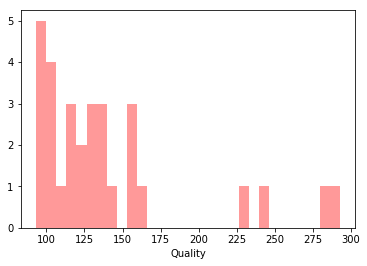

In [16]:
sns.distplot(data['Quality'],bins=30,kde=False,color='red');

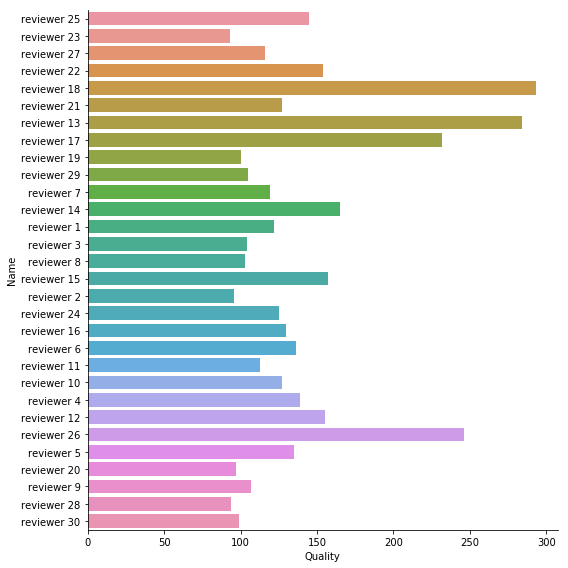

In [17]:
sns.factorplot(x='Quality',y='Name',data=data,kind='bar',size=8);

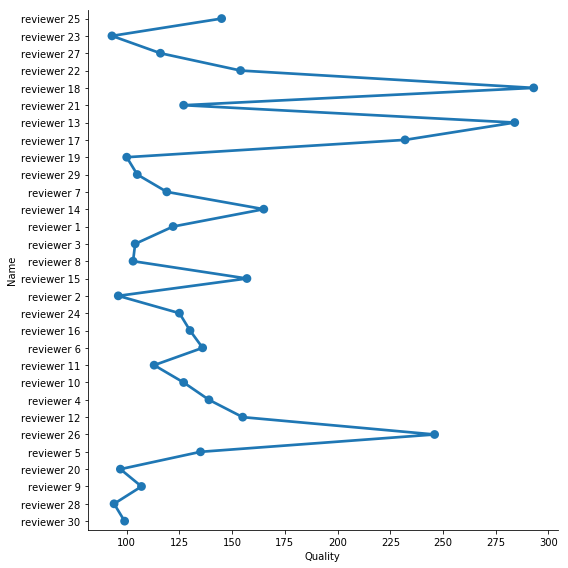

In [18]:
sns.factorplot(x='Quality',y='Name',data=data,size=8);

In [19]:
data.describe()

,Quality
count,30.000000
mean,140.600000
std,53.928177
min,93.000000
25%,104.250000
50%,126.000000
75%,151.750000
max,293.000000


In [20]:
metric = data.describe()['Quality'][6]

In [24]:
data.query('Quality > {}'.format(metric))

,Name,Quality
3,reviewer 22,154
4,reviewer 18,293
6,reviewer 13,284
7,reviewer 17,232
11,reviewer 14,165
15,reviewer 15,157
23,reviewer 12,155
24,reviewer 26,246


In [30]:
df['monitor'].value_counts()

not monitored           191483
accepted correctly       18635
refused correctly        10445
refused incorrectly       4299
accepted incorrectly      2834
Name: monitor, dtype: int64